**Le dataset CICIDS2017 est un ensemble de données de trafic réseau conçu pour l'évaluation des systèmes de détection d'intrusions. Il contient à la fois des flux de trafic bénin et des attaques réalistes, ce qui en fait un outil précieux pour le développement et la validation de modèles de Machine Learning dans le domaine de la cybersécurité.**

## Contenu des Fichiers Téléchargeables

- **PCAPs (format pcap)** : Ces fichiers contiennent les captures complètes du trafic réseau, y compris les paquets complets.

- **GeneratedLabelledFlows.zip** : Ce fichier contient les flux de trafic étiquetés, générés à partir des PCAPs, et est destiné aux applications de Machine Learning.

- **MachineLearningCSV.zip** : Ce fichier contient les données de trafic sous forme de fichiers CSV, extraites à l'aide de CICFlowMeter. Il inclut plus de 80 caractéristiques de flux réseau, ce qui facilite l'analyse et l'entraînement des modèles de Machine Learning.

## Caractéristiques du Dataset

- **Période de Capture** : Les données ont été collectées du lundi 3 juillet 2017 au vendredi 7 juillet 2017.

- **Types d'Attaques** : Inclut diverses attaques telles que :

    - Brute Force FTP

    - Brute Force SSH

    - DoS

    - Heartble

    - Web Attack

    - Infiltration

    - Botnet

    - DDoS

- **Protocoles Utilisés** : HTTP, HTTPS, FTP, SSH et email.

- **Configuration Réseau** : Comprend une topologie réseau complète avec modem, pare-feu, commutateurs, routeurs et divers systèmes d'exploitation (Windows, Ubuntu, Mac OS X).

## Utilisation du Dataset

Le CICIDS2017 est idéal pour développer des modèles de détection d'anomalies et d'intrusions dans les réseaux, grâce à sa diversité de trafic et d'attaques, ainsi que ses étiquettes détaillées pour chaque flux de trafic.


## Analyse fichier Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [43]:
import pandas as pd
import numpy as np
from skimpy import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [96]:
df1 = pd.read_csv("../data/raw/bronze/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [99]:
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    return df

df1 = clean_column_names(df1)
column_list = df1.columns.tolist()
print(column_list)

['destination_port', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s', 'min_packet_length', 'max_packet_length', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count

### Labels présents:
Voici une liste détaillée des labels avec leurs descriptions :

1. **Destination Port** : Le port de destination utilisé pour la communication.
2. **Flow Duration** : La durée totale du flux de données, généralement en microsecondes[3].
3. **Total Fwd Packets** : Le nombre total de paquets envoyés dans le sens avant (forward).
4. **Total Backward Packets** : Le nombre total de paquets reçus dans le sens arrière (backward).
5. **Total Length of Fwd Packets** : La taille totale des paquets envoyés dans le sens avant.
6. **Total Length of Bwd Packets** : La taille totale des paquets reçus dans le sens arrière.
7. **Fwd Packet Length Max** : La taille maximale d'un paquet envoyé dans le sens avant.
8. **Fwd Packet Length Min** : La taille minimale d'un paquet envoyé dans le sens avant.
9. **Fwd Packet Length Mean** : La taille moyenne des paquets envoyés dans le sens avant.
10. **Fwd Packet Length Std** : L'écart-type de la taille des paquets envoyés dans le sens avant.
11. **Bwd Packet Length Max** : La taille maximale d'un paquet reçu dans le sens arrière.
12. **Bwd Packet Length Min** : La taille minimale d'un paquet reçu dans le sens arrière.
13. **Bwd Packet Length Mean** : La taille moyenne des paquets reçus dans le sens arrière.
14. **Bwd Packet Length Std** : L'écart-type de la taille des paquets reçus dans le sens arrière.
15. **Flow Bytes/s** : Le débit moyen en octets par seconde pour le flux.
16. **Flow Packets/s** : Le nombre moyen de paquets par seconde pour le flux.
17. **Flow IAT Mean** : Le temps moyen entre deux paquets dans le flux.
18. **Flow IAT Std** : L'écart-type du temps entre deux paquets dans le flux.
19. **Flow IAT Max** : Le temps maximum entre deux paquets dans le flux.
20. **Flow IAT Min** : Le temps minimum entre deux paquets dans le flux.
21. **Fwd IAT Total** : Le temps total entre les paquets envoyés dans le sens avant.
22. **Fwd IAT Mean** : Le temps moyen entre deux paquets envoyés dans le sens avant.
23. **Fwd IAT Std** : L'écart-type du temps entre deux paquets envoyés dans le sens avant.
24. **Fwd IAT Max** : Le temps maximum entre deux paquets envoyés dans le sens avant.
25. **Fwd IAT Min** : Le temps minimum entre deux paquets envoyés dans le sens avant.
26. **Bwd IAT Total** : Le temps total entre les paquets reçus dans le sens arrière.
27. **Bwd IAT Mean** : Le temps moyen entre deux paquets reçus dans le sens arrière.
28. **Bwd IAT Std** : L'écart-type du temps entre deux paquets reçus dans le sens arrière.
29. **Bwd IAT Max** : Le temps maximum entre deux paquets reçus dans le sens arrière.
30. **Bwd IAT Min** : Le temps minimum entre deux paquets reçus dans le sens arrière.
31. **Fwd PSH Flags** : Le nombre de fois où le flag PSH est défini dans les paquets envoyés dans le sens avant.
32. **Bwd PSH Flags** : Le nombre de fois où le flag PSH est défini dans les paquets reçus dans le sens arrière.
33. **Fwd URG Flags** : Le nombre de fois où le flag URG est défini dans les paquets envoyés dans le sens avant.
34. **Bwd URG Flags** : Le nombre de fois où le flag URG est défini dans les paquets reçus dans le sens arrière.
35. **Fwd Header Length** : La longueur totale des en-têtes des paquets envoyés dans le sens avant.
36. **Bwd Header Length** : La longueur totale des en-têtes des paquets reçus dans le sens arrière.
37. **Fwd Packets/s** : Le nombre moyen de paquets par seconde envoyés dans le sens avant.
38. **Bwd Packets/s** : Le nombre moyen de paquets par seconde reçus dans le sens arrière.
39. **Min Packet Length** : La taille minimale d'un paquet dans le flux.
40. **Max Packet Length** : La taille maximale d'un paquet dans le flux.
41. **Packet Length Mean** : La taille moyenne des paquets dans le flux.
42. **Packet Length Std** : L'écart-type de la taille des paquets dans le flux.
43. **Packet Length Variance** : La variance de la taille des paquets dans le flux.
44. **FIN Flag Count** : Le nombre de paquets avec le flag FIN.
45. **SYN Flag Count** : Le nombre de paquets avec le flag SYN.
46. **RST Flag Count** : Le nombre de paquets avec le flag RST.
47. **PSH Flag Count** : Le nombre total de paquets avec le flag PSH (avant et arrière).
48. **ACK Flag Count** : Le nombre de paquets avec le flag ACK.
49. **URG Flag Count** : Le nombre total de paquets avec le flag URG (avant et arrière).
50. **CWE Flag Count** : Le nombre de paquets avec le flag CWE.
51. **ECE Flag Count** : Le nombre de paquets avec le flag ECE.
52. **Down/Up Ratio** : Le rapport entre le trafic descendant et montant.
53. **Average Packet Size** : La taille moyenne des paquets dans le flux.
54. **Avg Fwd Segment Size** : La taille moyenne des segments envoyés dans le sens avant.
55. **Avg Bwd Segment Size** : La taille moyenne des segments reçus dans le sens arrière.
56. **Fwd Header Length.1** : Une autre mesure de la longueur des en-têtes des paquets envoyés (possiblement une erreur de duplication).
57. **Fwd Avg Bytes/Bulk** : Le nombre moyen d'octets par lot dans le sens avant.
58. **Fwd Avg Packets/Bulk** : Le nombre moyen de paquets par lot dans le sens avant.
59. **Fwd Avg Bulk Rate** : Le débit moyen par lot dans le sens avant.
60. **Bwd Avg Bytes/Bulk** : Le nombre moyen d'octets par lot dans le sens arrière.
61. **Bwd Avg Packets/Bulk** : Le nombre moyen de paquets par lot dans le sens arrière.
62. **Bwd Avg Bulk Rate** : Le débit moyen par lot dans le sens arrière.
63. **Subflow Fwd Packets** : Le nombre moyen de paquets dans un sous-flux envoyé dans le sens avant.
64. **Subflow Fwd Bytes** : Le nombre moyen d'octets dans un sous-flux envoyé dans le sens avant.
65. **Subflow Bwd Packets** : Le nombre moyen de paquets dans un sous-flux reçu dans le sens arrière.
66. **Subflow Bwd Bytes** : Le nombre moyen d'octets dans un sous-flux reçu dans le sens arrière.
67. **Init_Win_bytes_forward** : Le nombre total d'octets envoyés dans la fenêtre initiale dans le sens avant.
68. **Init_Win_bytes_backward** : Le nombre total d'octets envoyés dans la fenêtre initiale dans le sens arrière.
69. **act_data_pkt_fwd** : Le nombre de paquets avec au moins un octet de charge utile TCP envoyé dans le sens avant.
70. **min_seg_size_forward** : La taille minimale d'un segment envoyé dans le sens avant.
71. **Active Mean** : La durée moyenne pendant laquelle un flux est actif avant de devenir inactif.
72. **Active Std** : L'écart-type de la durée pendant laquelle un flux est actif.
73. **Active Max** : La durée maximale pendant laquelle un flux est actif.
74. **Active Min** : La durée minimale pendant laquelle un flux est actif.
75. **Idle Mean** : La durée moyenne pendant laquelle un flux est inactif avant de reprendre.
76. **Idle Std** : L'écart-type de la durée pendant laquelle un flux est inactif.
77. **Idle Max** : La durée maximale pendant laquelle un flux est inactif.
78. **Idle Min** : La durée minimale pendant laquelle un flux est inactif.
79. **Label** : La classification ou l'étiquette associée au flux (par exemple, normal ou anormal).

In [54]:
df1.describe()

/home/antoine/miniconda3/envs/logs_project/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/antoine/miniconda3/envs/logs_project/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             225745 non-null  int64  
 1   flow_duration                225745 non-null  int64  
 2   total_fwd_packets            225745 non-null  int64  
 3   total_backward_packets       225745 non-null  int64  
 4   total_length_of_fwd_packets  225745 non-null  int64  
 5   total_length_of_bwd_packets  225745 non-null  int64  
 6   fwd_packet_length_max        225745 non-null  int64  
 7   fwd_packet_length_min        225745 non-null  int64  
 8   fwd_packet_length_mean       225745 non-null  float64
 9   fwd_packet_length_std        225745 non-null  float64
 10  bwd_packet_length_max        225745 non-null  int64  
 11  bwd_packet_length_min        225745 non-null  int64  
 12  bwd_packet_length_mean       225745 non-null  float64
 13 

In [64]:
# verification des nan
def print_columns_with_nan(df):
    """
    Prints the names of columns in a DataFrame that contain NaN values.

    Args:
        df: The pandas DataFrame to check.
    """
    nan_columns = df.columns[df.isnull().any()].tolist()

    if nan_columns:
        print("Columns containing NaN values:")
        for col in nan_columns:
            print(f"- {col}")
    else:
        print("No columns with NaN values found.")

print_columns_with_nan(df1)

Columns containing NaN values:
- flow_bytes/s


In [57]:
nan_count = df1['flow_bytes/s'].isnull().value_counts()
print(nan_count)

flow_bytes/s
False    225741
True          4
Name: count, dtype: int64


In [97]:
# Suppression des colonnes avec des valeurs manquantes
df1 = df1.dropna(axis=0, how='any')
# Suppression des doublons
df1 = df1.drop_duplicates()

In [100]:
# Affichage de nos valeurs cibles
df1['label'].value_counts()

label
DDoS      128016
BENIGN     95092
Name: count, dtype: int64

#### Normalisation

In [ ]:
# Transformation des valeurs cibles en 0 et 1
df1['label'] = df1['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
# Target
y = df1['label']
# Features
X = df1.drop(columns=['label'])
# Standardisation des features
scaler = RobustScaler(quantile_range=(25, 75), unit_variance=True).fit(X)
data_standardized = scaler.transform(X)


ValueError: Input X contains infinity or a value too large for dtype('float64').

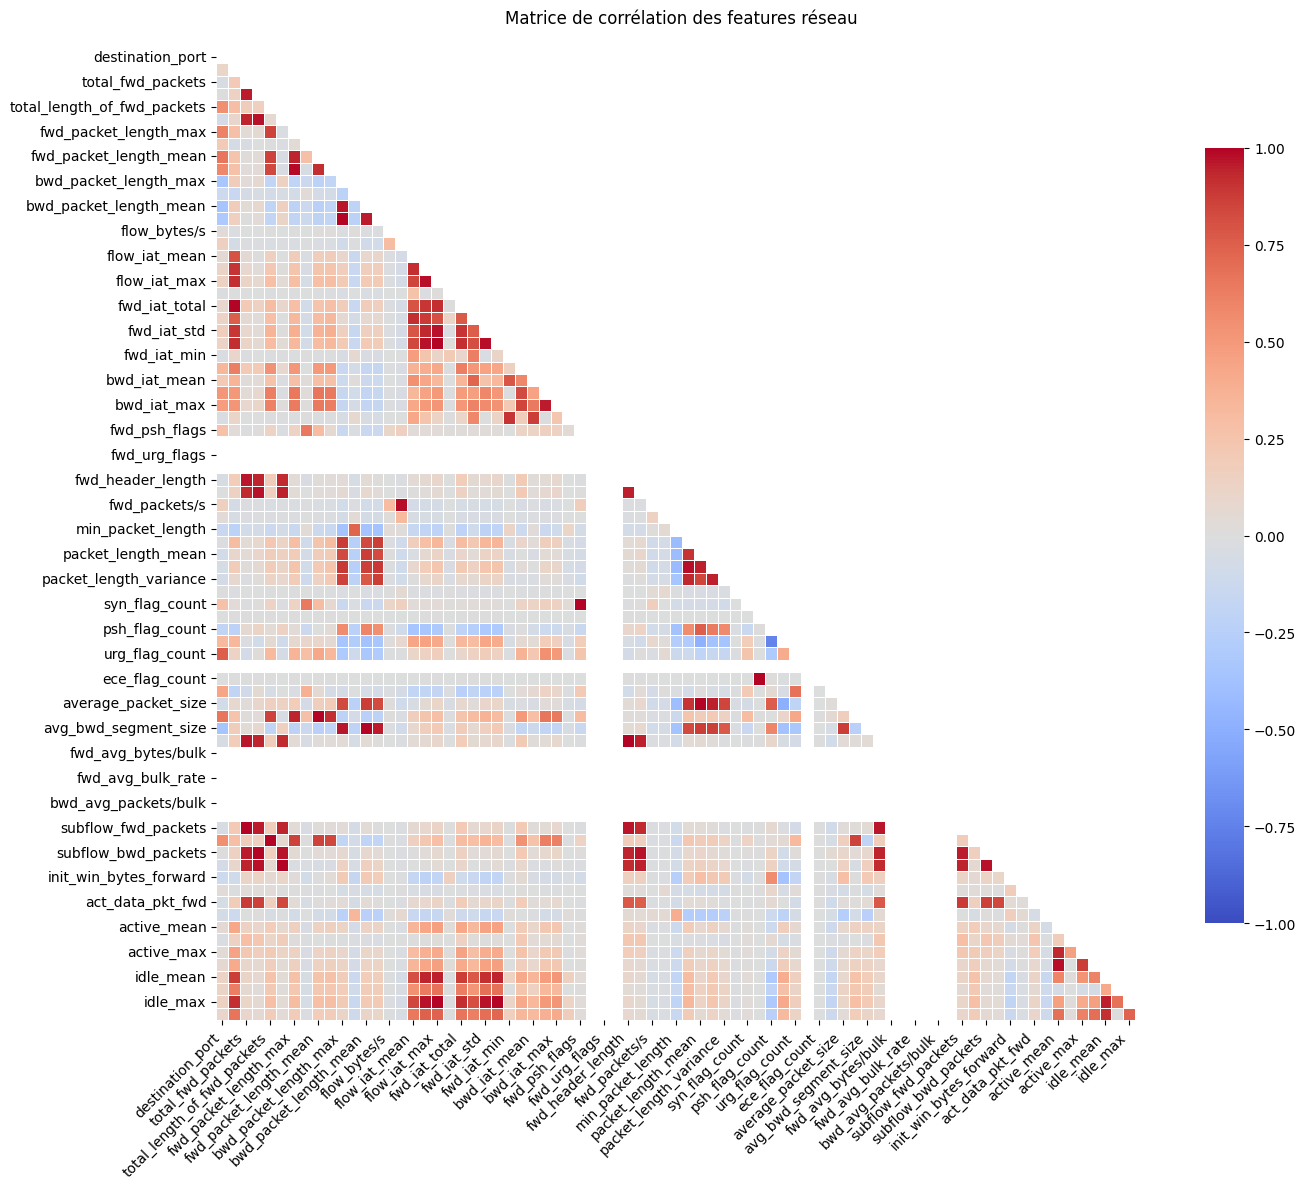

In [ ]:
# Calcul de la matrice avec méthode Pearson (par défaut)
corr_matrix = data.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
           mask=mask,
           annot=False,
           cmap='coolwarm',
           linewidths=0.5,
           vmin=-1, vmax=1,
           cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation des features réseau", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Cette matrice de corrélation révèle plusieurs éléments cruciaux pour notre projet de détection d'anomalies dans les logs réseau :

#### Fortes multicolinéarités entre features
- **Blocs de corrélation** : On observe des groupes de features fortement corrélées entre elles (zones rouges intenses hors diagonale)
- **Redondance d'information** : Les métriques liées aux paquets (`packet_length_mean`, `packet_length_variance`) sont très corrélées

#### Corrélations significatives avec la cible
- **Features temporelles** : `active_max`, `idle_mean` et `idle_max` montrent des corrélations importantes avec la variable cible
- **Statistiques de flux** : Plusieurs métriques de flux présentent des signatures distinctes selon le type de trafic (normal vs attaque)

#### Groupes fonctionnels distincts
- **Métriques directionnelles** : Les features liées au trafic avant (`fwd_`) et arrière (`bwd_`) forment des clusters cohérents
- **Flags TCP/IP** : Les compteurs de flags (`syn_flag_count`, `psh_flag_count`) sont corrélés et reflètent des signatures d'attaques spécifiques
- **Temporalité** : Les métriques de temps inter-arrivée (`flow_iat_`) forment un groupe distinct

#### Implications pour notre modèle
1. **Réduction dimensionnelle justifiée** : La forte multicolinéarité suggère qu'un sous-ensemble réduit de features peut capturer l'essentiel de l'information
2. **Risque de surapprentissage** : Les corrélations très fortes peuvent indiquer des patterns trop spécifiques au dataset d'entraînement
3. **Potentiel "data leakage"** : Certaines features pourraient être des indicateurs directs d'attaques, expliquant les performances parfaites

Pour optimiser notre approche :
- Nous réduirons drastiquement le nombre de features (k=5 ou k=10)
- Nous considererons des validations temporelles plutôt que aléatoires
- Nous examinerons les features les plus corrélées avec la cible pour comprendre la logique de classification


In [105]:
# Calcul de la corrélation avec la cible
target_corr = df1.corr()['label'].abs().sort_values(ascending=False)[1:10]

In [106]:
print(target_corr)

bwd_packet_length_mean    0.599947
avg_bwd_segment_size      0.599947
bwd_packet_length_max     0.573836
bwd_packet_length_std     0.572761
destination_port          0.520355
urg_flag_count            0.472139
packet_length_mean        0.448303
average_packet_size       0.447603
packet_length_std         0.437702
Name: label, dtype: float64


In [85]:
print("Valeurs cibles uniques :", df1['label'].unique())

Valeurs cibles uniques : [0 1]


## Préparation du dataset

In [ ]:


# Création d'un ensemble d'entrainement et d'un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(data_standardized, target_encode, test_size=0.2, random_state=42)

## Features selection

Deleted features: [31 32 33 49 56 57 58 59 60 61]


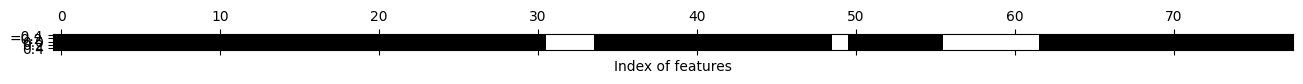

In [67]:
# Suppression des features de variance nulle, inutile à l'entrainement
sel = VarianceThreshold(1e-6)
sel.fit(X_train)
# Affichage des features supprimées
mask = sel.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Index of features")
del_features = np.where(mask == False)[0]
print(f"Deleted features: {del_features}")

In [68]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

**Maintenant que nous avons supprimé les colonnes avec variance nulle, nous souhaitons connaitre les features les plus importantes. S'agissant d'un problème de classification, nous devons choisir entre 2 score func**

In [44]:
# Choix des meilleures features abec SelectKbest
# Avec mutual_info
selector_mi = SelectKBest(mutual_info_classif, k=20)
X_mi = selector_mi.fit_transform(X_train, y_train)
score_mi = cross_val_score(RandomForestClassifier(), X_mi, y_train, cv=5).mean()

# Avec f_classif
selector_f = SelectKBest(f_classif, k=20)
X_f = selector_f.fit_transform(X_train, y_train)
score_f = cross_val_score(RandomForestClassifier(), X_f, y_train, cv=5).mean()

print(f"Score mutual_info: {score_mi:.3f} | Score f_classif: {score_f:.3f}")


Score mutual_info: 1.000 | Score f_classif: 1.000


**Les scores de validation croisée de 1.00 démontrent qu'on a possiblement une ou plusieurs features contenant des infos liées à la cible**

In [ ]:
# Conversion de X_train (numpy array) en DataFrame
X_train_df = pd.DataFrame(X_train, columns=column_list[:-1])
# Conversion de y_train (numpy array) en Series avec index aligné
y_train_series = pd.Series(y_train.ravel(), name='Target', index=X_train_df.index)

combined_data = pd.concat([X_train_df, y_train_series], axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(combined_data.corr(), annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation avec la cible")
plt.show()


ValueError: Shape of passed values is (178486, 68), indices imply (178486, 78)

In [50]:
# Comparer les features sélectionnées par les deux méthodes
print("Communes :", set(selector_mi.get_feature_names_out()) & set(selector_f.get_feature_names_out()))


Communes : {'x6', 'x12', 'x53', 'x49', 'x10', 'x0', 'x50', 'x8', 'x48', 'x4'}


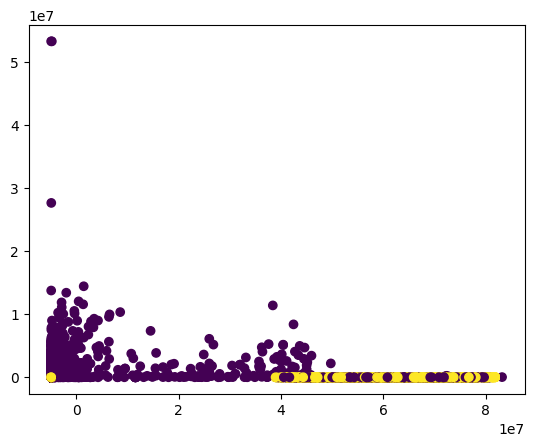

In [51]:
# Vérifier la présence de classes parfaitement séparables
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X_train)
plt.scatter(pca[:,0], pca[:,1], c=y_train)
